# Contents
- 1 Goal
- 2 importing libraries
- 3 Reading the data
- 4 Exploratory data analysis (EDA)<font color='blue'>
  - 4.1 Pairplot
  - 4.2 Pearson correlation and feature selection
  - 4.3 Class distribution </font>
- 5 Preparing the data
- 6 Machine learning models <font color='blue'>
  - 6.1 k-Nearest Neighbour (KNN)
  - 6.2 Logistic regression
  - 6.3 Decision tree
  - 6.4 Random forest
  - 6.5 Gradient boosting 
  - 6.6 Support vector machine
  - 6.7 Neural network
  - 6.8 XGBoost
  - 6.9 CatBoost</font>
- 7 Model Comparison
- 8 Conclusion

# Goal

__Classification of effectiveness of the drug based on Lipinski molecular descriptors for ABL-kinase using Machine learning classfiers.__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


%matplotlib inline

In [2]:
df= pd.read_csv('kinase.csv',index_col=0)

In [3]:
df.head()

,index,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,norm_value,pIC50
0,0,CHEMBL281470,COc1ccc(-c2[nH]nc3c2C(=O)c2ccccc2-3)cc1,725000.0,inactive,276.295,3.2967,1.0,3.0,725000.0,3.139662
2,2,CHEMBL13462,CC(=O)N[C@@H](Cc1ccc(OP(=O)(O)O)cc1)C(=O)N[C@@...,16000.0,inactive,569.592,2.3738,5.0,6.0,16000.0,4.795880
3,3,CHEMBL414123,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,15000.0,inactive,1473.536,-1.0806,17.0,19.0,15000.0,4.823909
6,6,CHEMBL413629,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](...,13500.0,inactive,1507.544,-0.3251,17.0,18.0,13500.0,4.869666
7,7,CHEMBL301845,CC[C@H](NC(=O)[C@H](Cc1ccc(OP(=O)(O)O)cc1)NC(C...,15000.0,inactive,525.583,2.9190,4.0,5.0,15000.0,4.823909


# Exploratory data analysis (EDA)

In [4]:
print("dimension of tubulin data: {}".format(df.shape))

dimension of tubulin data: (2429, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2429 entries, 0 to 2751
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2429 non-null   int64  
 1   molecule_chembl_id  2429 non-null   object 
 2   canonical_smiles    2429 non-null   object 
 3   standard_value      2429 non-null   float64
 4   bioactivity_class   2429 non-null   object 
 5   MW                  2429 non-null   float64
 6   LogP                2429 non-null   float64
 7   NumHDonors          2429 non-null   float64
 8   NumHAcceptors       2429 non-null   float64
 9   norm_value          2429 non-null   float64
 10  pIC50               2429 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 227.7+ KB


In [6]:
selection = ['MW','LogP','NumHDonors','NumHAcceptors','bioactivity_class']
df = df[selection]

## Pairplot of the all the features

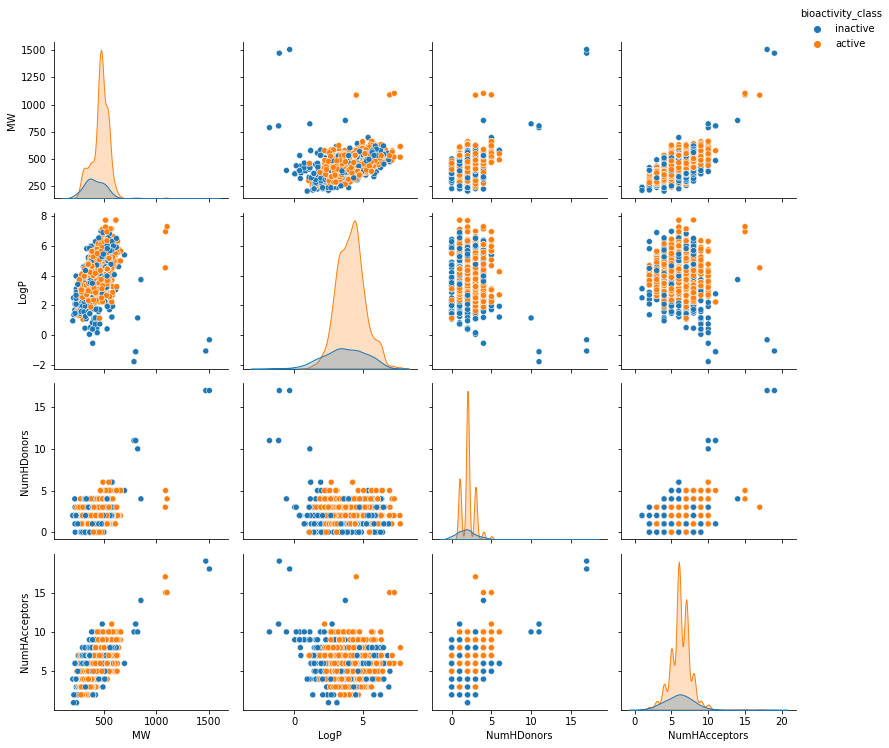

In [7]:
selection = ['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors']
sns.pairplot(df[selection], hue='bioactivity_class')._legend.set_bbox_to_anchor((1.1,1))
plt.tight_layout()

##  Pearson correlation and feature selection

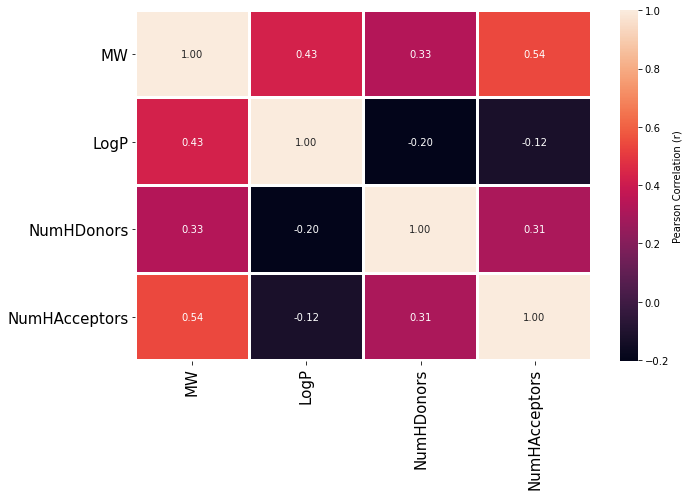

In [8]:
plt.figure(figsize=(10,7))
corr_mat = df.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15,rotation=0)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

- All the features hold very little correlation amongst each other. Only NumHAcceptors and Molecular weight shows a significant strong correlation. Therefore, keeping the all the features.

## Class distribution 

/home/pandey/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


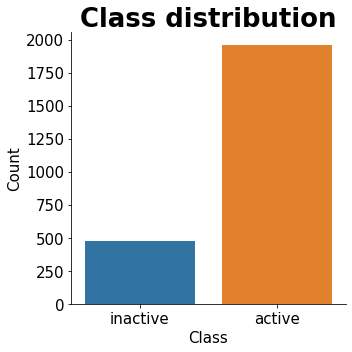

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(df['bioactivity_class'],label='Count')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Count',size=15)
plt.xlabel('Class',size=15)
sns.despine(top=True)
plt.title('Class distribution',size=26, weight='bold')
plt.tight_layout()
plt.savefig('Class-distribution.png');

# Preparing data for machine learning

In [10]:
df['bioactivity_class'] = df['bioactivity_class'].map({'inactive':0, 'active':1})

In [11]:
X = df.iloc[:,:-1].values   ##features selection
y = df.iloc[:,-1].values    ## target selection

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=27,test_size=0.3)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 4), (729, 4), (1700,), (729,))

In [14]:
rs = SMOTE(sampling_strategy='auto')
X_train,y_train = rs.fit_resample(X_train,y_train)

/home/pandey/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

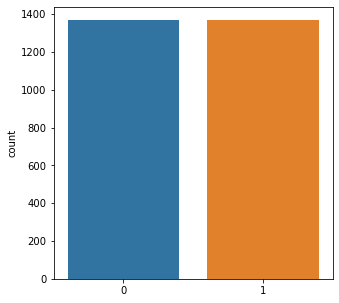

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(y_train)

# Machine Learning Models

## KNN

In [16]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,20)

for n_neighbors in neighbors_settings:
    print(f'working on neighbors {n_neighbors}')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

working on neighbors 2
working on neighbors 3
working on neighbors 4
working on neighbors 5
working on neighbors 6
working on neighbors 7
working on neighbors 8
working on neighbors 9
working on neighbors 10
working on neighbors 11
working on neighbors 12
working on neighbors 13
working on neighbors 14
working on neighbors 15
working on neighbors 16
working on neighbors 17
working on neighbors 18
working on neighbors 19


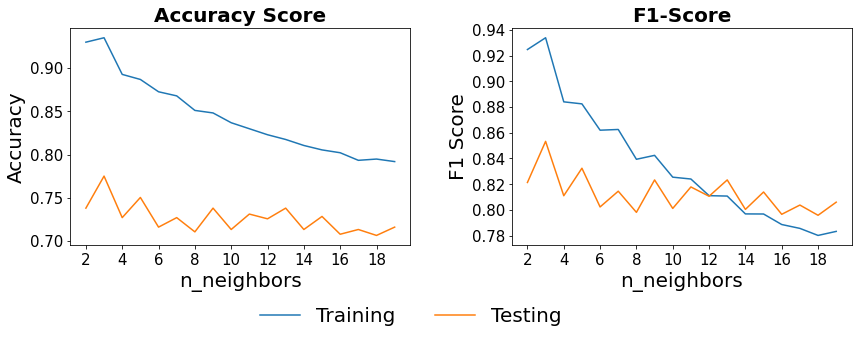

In [17]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(range(2,20,2),size=15)
plt.yticks(size=15)
plt.xlabel('n_neighbors',size=20)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False, prop={'size':20})

fig.add_subplot(2,2,2)
plt.plot(neighbors_settings, training_f1)
plt.plot(neighbors_settings, test_f1)
plt.xticks(range(2,20,2),size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('n_neighbors',size=20)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.2,-0.2), ncol=2, prop={'size':20});

Accuracy score, F1-score suggest that n_neighbors=4 is the optimum choice (by looking a testing accuracies).

In [18]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F1-score of K-NN classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy of K-NN classifier on test set: 0.89
Accuracy of K-NN classifier on test set: 0.75
F1-score of K-NN classifier on test set: 0.83


In [19]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = (conf_mat.T/counts).T
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

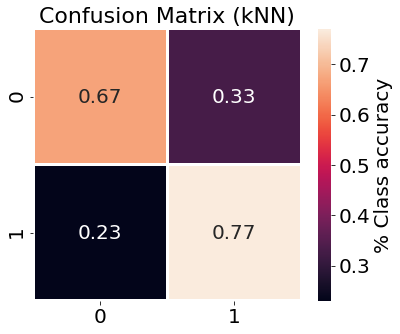

In [20]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')

In [21]:
k_fold_knn_accuracy = cross_val_score(knn, X, y, cv=10) ##10-fold cross validation
k_fold_knn_f1 = cross_val_score(knn, X, y, cv=10,scoring='f1_weighted') ##10-fold cross validation

In [22]:

print(f'Average accuracy after 10 fold cross validation :{k_fold_knn_accuracy.mean().round(2)} +/- {k_fold_knn_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_knn_f1.mean().round(2)} +/- {k_fold_knn_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.77 +/- 0.06
Average F1-score after 10 fold cross validation :0.74 +/- 0.05


# Logistic Regression

C : 1 Training set accuracy: 0.609
C : 1 Test set accuracy: 0.654
C : 1 Training set F1-score: 0.623
C : 1 Test set F1-score: 0.755


C : 0.01 Training set accuracy: 0.607
C : 0.01 Test set accuracy: 0.708
C : 0.01 Training set F1-score: 0.638
C : 0.01 Test set F1-score: 0.802


C : 100 Training set accuracy: 0.609
C : 100 Test set accuracy: 0.654
C : 100 Training set F1-score: 0.622
C : 100 Test set F1-score: 0.755




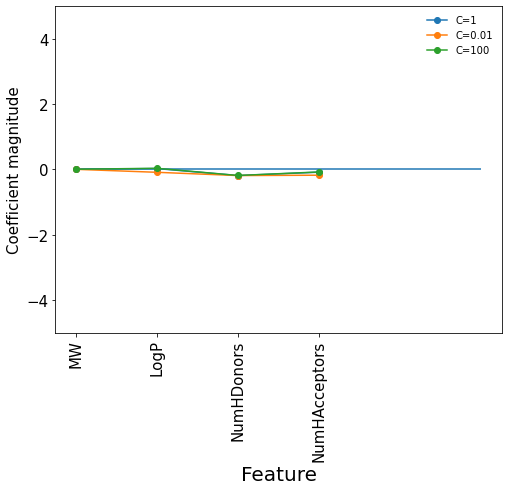

In [23]:
plt.figure(figsize=(8,6))
Clist=[1,0.01,100]

for C in Clist : 

    logreg = LogisticRegression(C=C,solver='liblinear').fit(X_train, y_train) #keeping C=1 a
    y_train_pred = logreg.predict(X_train)
    y_pred = logreg.predict(X_test)

    print('C : {} Training set accuracy: {:.3f}'.format(C,accuracy_score(y_train, y_train_pred)))
    print('C : {} Test set accuracy: {:.3f}'.format(C,accuracy_score(y_test, y_pred)))

    print('C : {} Training set F1-score: {:.3f}'.format(C,f1_score(y_train, y_train_pred)))
    print('C : {} Test set F1-score: {:.3f}'.format(C, f1_score(y_test, y_pred)))
    print('\n')
    
    data_features = [x for i,x in enumerate(df.columns[:-1]) if i!=8]
    plt.plot(logreg.coef_.T, marker='o', label=f"C={C}")

plt.xticks(range(X_train.shape[1]), data_features, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Feature",size=20)
plt.ylabel("Coefficient magnitude",size=15)
plt.legend(frameon=False)

In [24]:
logreg = LogisticRegression(C=1,solver='liblinear').fit(X_train,y_train)
y_pred=logreg.predict(X_test)

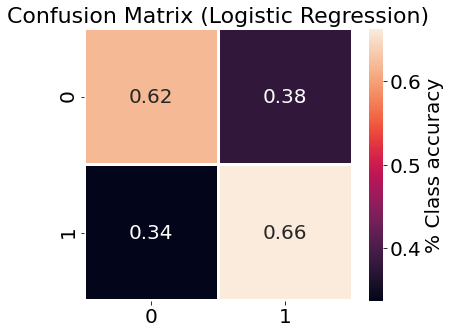

In [25]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Logistic Regression')

In [26]:
k_fold_logreg_accuracy = cross_val_score(logreg, X, y, cv=10) ##10-fold cross validation
k_fold_logreg_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [27]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_logreg_accuracy.mean().round(2)} +/- {k_fold_logreg_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_logreg_f1.mean().round(2)} +/- {k_fold_logreg_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.79 +/- 0.06
Average F1-score after 10 fold cross validation :0.71 +/- 0.03


# Decision Tree

In [28]:
max_depth=range(1,20)
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth : 
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

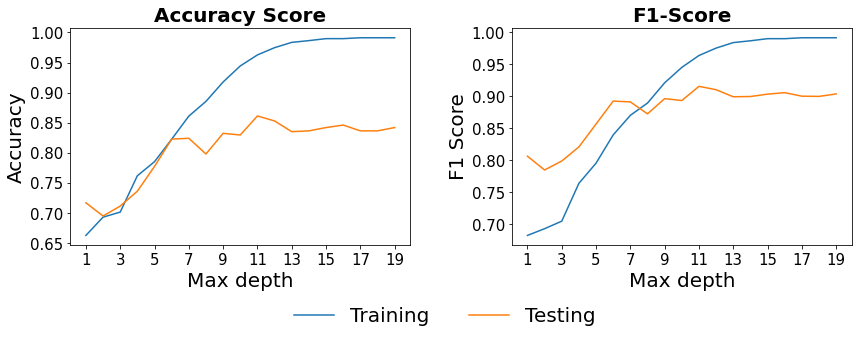

In [29]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(range(1,20,2),size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(range(1,20,2),size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.3,-0.2), prop = {'size':20}, ncol=2);

Setting `max_depth=9`, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [30]:
tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.833
F1-score on test set: 0.896


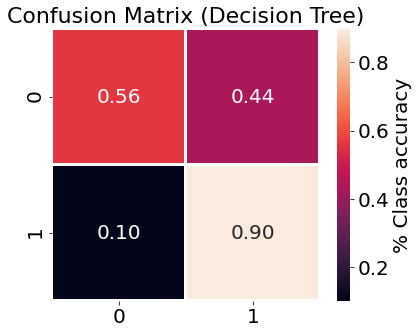

In [31]:

conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Decision Tree')

In [32]:
k_fold_tree_accuracy = cross_val_score(tree, X, y, cv=10) ##10-fold cross validation
k_fold_tree_f1 = cross_val_score(tree, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [33]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.77 +/- 0.11
Average F1-score after 10 fold cross validation :0.77 +/- 0.08


In [34]:
def plot_feature_importances(model, figure):
    n_features = 4
    plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features,size=15)
    plt.xticks(size=15)
    plt.xlabel('Feature importance',size=20,)
    #plt.ylabel('Feature',size=20)
    plt.ylim(-1, n_features)
    sns.despine(top=True)
    plt.title(f'{figure}',size=20)
    plt.tight_layout()
    plt.savefig(f'feature-image{figure}.png',dpi=300)

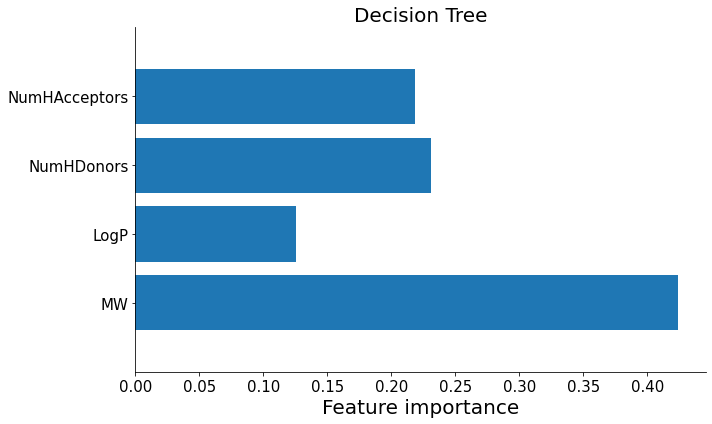

In [35]:
plot_feature_importances(tree,'Decision Tree')

# Random Forest

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred=rf.predict(X_test)

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.881
F1-score on test set: 0.927


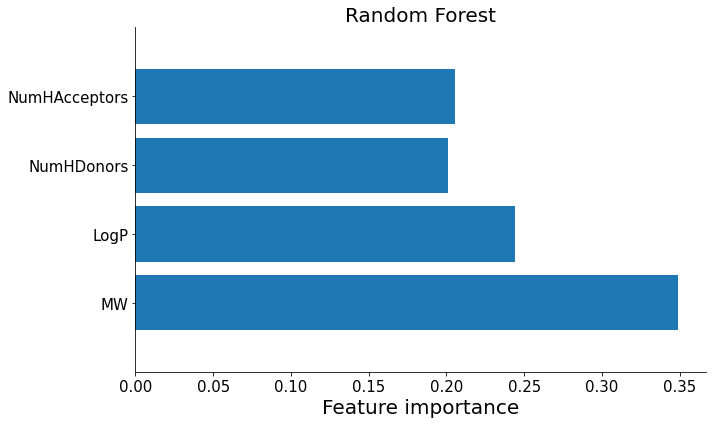

In [37]:
plot_feature_importances(rf, 'Random Forest')

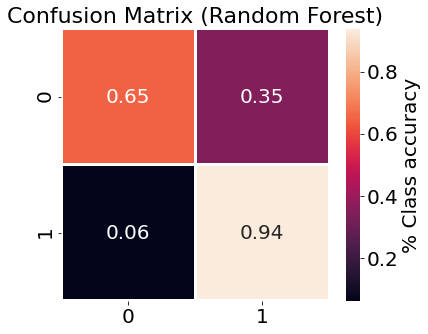

In [38]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Random Forest')

In [39]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=10) ##10-fold cross validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [40]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.77 +/- 0.11
Average F1-score after 10 fold cross validation :0.77 +/- 0.08


# Gradient Boosting

In [41]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred=gb.predict(X_test)

print("Accuracy on train: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.893
Accuracy on test: 0.846
F1-score on test set: 0.907


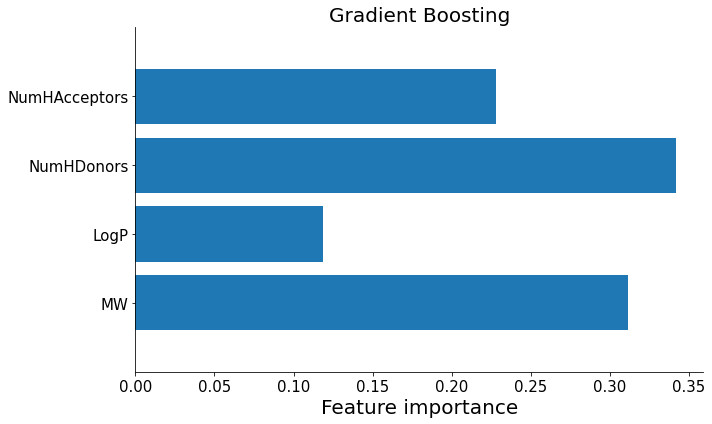

In [42]:
plot_feature_importances(gb, 'Gradient Boosting')

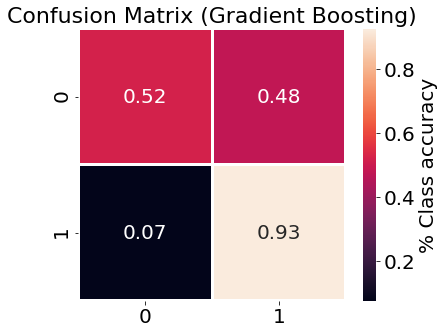

In [43]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Gradient Boosting')

In [44]:
k_fold_gb_accuracy = cross_val_score(gb, X, y, cv=10) ##10-fold cross validation
k_fold_gb_f1 = cross_val_score(gb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [45]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_gb_accuracy.mean().round(2)} +/- {k_fold_gb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_gb_f1.mean().round(2)} +/- {k_fold_gb_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.79 +/- 0.07
Average F1-score after 10 fold cross validation :0.77 +/- 0.06


# SVM

In [46]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#SVM requiest feature scaling
svc = SVC().fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.687
Accuracy on test: 0.730
F1-score on test set: 0.816


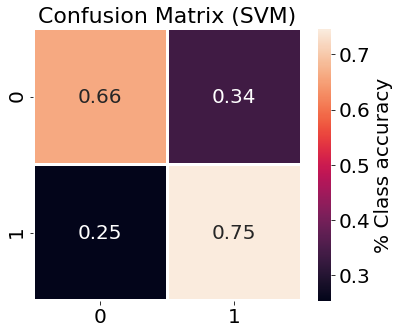

In [47]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'SVM')

In [48]:
k_fold_svm_accuracy = cross_val_score(svc, scaler.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_svm_f1 = cross_val_score(svc, scaler.fit_transform(X), y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [49]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_svm_accuracy.mean().round(2)} +/- {k_fold_svm_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_svm_f1.mean().round(2)} +/- {k_fold_svm_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.81 +/- 0.03
Average F1-score after 10 fold cross validation : 0.75 +/- 0.04


# Neural Network

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0,max_iter=2000).fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.806
Accuracy on test: 0.774
F1-score on test set: 0.846


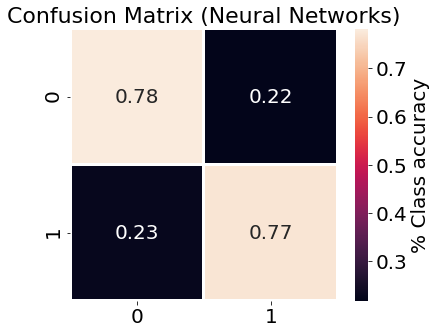

In [51]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Neural Networks')

In [52]:
k_fold_mlp_accuracy = cross_val_score(mlp, scaler.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_mlp_f1 = cross_val_score(mlp, scaler.fit_transform(X), y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [53]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_mlp_accuracy.mean().round(2)} +/- {k_fold_mlp_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_mlp_f1.mean().round(2)} +/- {k_fold_mlp_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.77 +/- 0.1
Average F1-score after 10 fold cross validation : 0.76 +/- 0.08


# XGBoost

In [54]:
xgb = XGBClassifier().fit(X_train,y_train)

y_pred=xgb.predict(X_test)

print("Accuracy on train: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(xgb.score(X_test, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.988
Accuracy on test: 0.874
F1-score on test set: 0.923


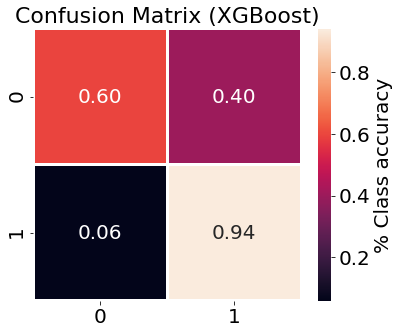

In [55]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'XGBoost')

In [56]:
k_fold_xgb_accuracy = cross_val_score(xgb, X, y, cv=10) ##10-fold cross validation
k_fold_xgb_f1 = cross_val_score(xgb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [57]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_xgb_accuracy.mean().round(2)} +/- {k_fold_xgb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_xgb_f1.mean().round(2)} +/- {k_fold_xgb_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.78 +/- 0.09
Average F1-score after 10 fold cross validation : 0.78 +/- 0.07


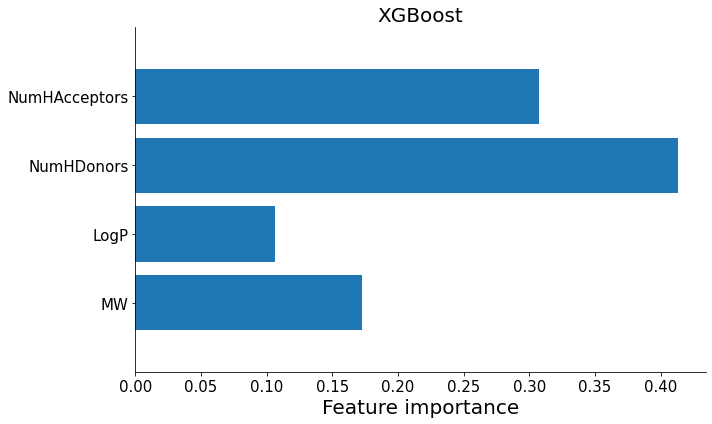

In [58]:
plot_feature_importances(xgb, 'XGBoost')

# CatBoost

In [59]:
clf = CatBoostClassifier(
    iterations=47, 
    learning_rate=1, 
    loss_function='CrossEntropy',
    depth=6
)

clf.fit(X_train, y_train, 
        eval_set=(X_test, y_test), 
        verbose=False,
)
y_pred=clf.predict(X_test)

print("Accuracy on train: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(clf.score(X_test,y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.951
Accuracy on test: 0.877
F1-score on test set: 0.924


Setting `depth=6` reduces overfitting and iteration=47 obtained from `clf.best_iteration_`

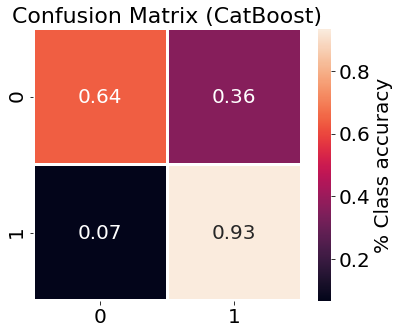

In [60]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'CatBoost')

In [61]:
k_fold_clf_accuracy = cross_val_score(clf, X, y, cv=10) ##10-fold cross validation
k_fold_clf_f1 = cross_val_score(xgb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

0:	learn: 0.4362091	total: 1.99ms	remaining: 91.4ms
1:	learn: 0.3912927	total: 3.45ms	remaining: 77.7ms
2:	learn: 0.3637011	total: 4.69ms	remaining: 68.8ms
3:	learn: 0.3448164	total: 5.89ms	remaining: 63.3ms
4:	learn: 0.3364761	total: 7.04ms	remaining: 59.2ms
5:	learn: 0.3313895	total: 8.23ms	remaining: 56.2ms
6:	learn: 0.3261918	total: 9.37ms	remaining: 53.5ms
7:	learn: 0.3161842	total: 10.6ms	remaining: 51.9ms
8:	learn: 0.3088445	total: 11.8ms	remaining: 50ms
9:	learn: 0.3018507	total: 13ms	remaining: 48.1ms
10:	learn: 0.2927047	total: 14.2ms	remaining: 46.4ms
11:	learn: 0.2861207	total: 15.3ms	remaining: 44.6ms
12:	learn: 0.2799298	total: 16.4ms	remaining: 43ms
13:	learn: 0.2779581	total: 17.5ms	remaining: 41.2ms
14:	learn: 0.2689817	total: 18.6ms	remaining: 39.6ms
15:	learn: 0.2667876	total: 19.6ms	remaining: 37.9ms
16:	learn: 0.2616901	total: 20.7ms	remaining: 36.5ms
17:	learn: 0.2593373	total: 21.9ms	remaining: 35.2ms
18:	learn: 0.2552671	total: 22.9ms	remaining: 33.8ms
19:	learn

0:	learn: 0.4456495	total: 2.02ms	remaining: 92.9ms
1:	learn: 0.4046917	total: 3.64ms	remaining: 82ms
2:	learn: 0.3763498	total: 5.13ms	remaining: 75.2ms
3:	learn: 0.3677510	total: 6.49ms	remaining: 69.7ms
4:	learn: 0.3470156	total: 7.72ms	remaining: 64.8ms
5:	learn: 0.3423680	total: 8.9ms	remaining: 60.8ms
6:	learn: 0.3341239	total: 10.1ms	remaining: 57.6ms
7:	learn: 0.3264061	total: 11.4ms	remaining: 55.4ms
8:	learn: 0.3129291	total: 12.6ms	remaining: 53.3ms
9:	learn: 0.3079229	total: 13.8ms	remaining: 51.1ms
10:	learn: 0.3015266	total: 15ms	remaining: 49.1ms
11:	learn: 0.2982585	total: 16.1ms	remaining: 47ms
12:	learn: 0.2907495	total: 17.3ms	remaining: 45.1ms
13:	learn: 0.2846472	total: 18.4ms	remaining: 43.3ms
14:	learn: 0.2823949	total: 19.5ms	remaining: 41.7ms
15:	learn: 0.2715596	total: 20.6ms	remaining: 39.9ms
16:	learn: 0.2679172	total: 21.7ms	remaining: 38.3ms
17:	learn: 0.2657012	total: 22.8ms	remaining: 36.7ms
18:	learn: 0.2633998	total: 24ms	remaining: 35.3ms
19:	learn: 0

In [62]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_clf_accuracy.mean().round(2)} +/- {k_fold_clf_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_clf_f1.mean().round(2)} +/- {k_fold_clf_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.77 +/- 0.1
Average F1-score after 10 fold cross validation : 0.78 +/- 0.07


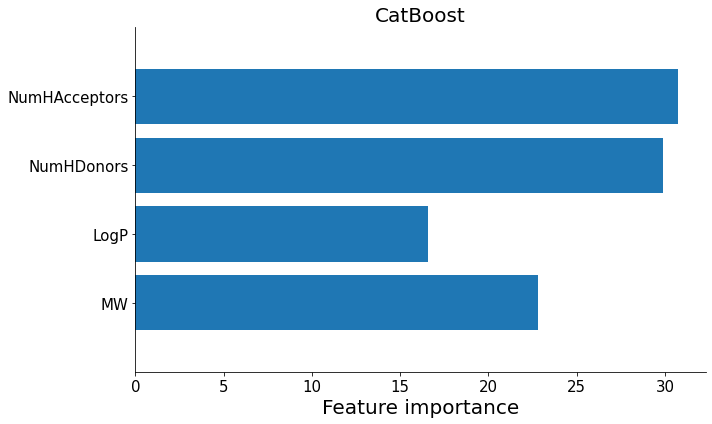

In [63]:
plot_feature_importances(clf,'CatBoost')

# Model Comparison

In [64]:
all_accuracies = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_tree_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_gb_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2),
                   k_fold_mlp_accuracy.mean().round(2),
                   k_fold_xgb_accuracy.mean().round(2),
                   k_fold_clf_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_knn_accuracy.std().round(2),
                   k_fold_logreg_accuracy.std().round(2),
                   k_fold_tree_accuracy.std().round(2),
                   k_fold_rf_accuracy.std().round(2),
                   k_fold_gb_accuracy.std().round(2),      
                   k_fold_svm_accuracy.std().round(2),
                   k_fold_mlp_accuracy.std().round(2),
                   k_fold_xgb_accuracy.std().round(2),
                   k_fold_clf_accuracy.std().round(2)     ]

In [65]:
all_f1 = [k_fold_knn_f1.mean().round(2),
                   k_fold_logreg_f1.mean().round(2),
                   k_fold_tree_f1.mean().round(2),
                   k_fold_rf_f1.mean().round(2),
                   k_fold_gb_f1.mean().round(2),
                   k_fold_svm_f1.mean().round(2),
                   k_fold_mlp_f1.mean().round(2),
                   k_fold_xgb_f1.mean().round(2),
                   k_fold_clf_f1.mean().round(2)]

all_f1_errors = [k_fold_knn_f1.std().round(2),
                   k_fold_logreg_f1.std().round(2),
                   k_fold_tree_f1.std().round(2),
                   k_fold_rf_f1.std().round(2),
                   k_fold_gb_f1.std().round(2),
                   k_fold_svm_f1.std().round(2),
                   k_fold_mlp_f1.std().round(2),
                   k_fold_xgb_f1.std().round(2),
                   k_fold_clf_f1.std().round(2)]

In [66]:
models=['kNN','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','SVM','Neural Networks', 'XGBoost','CatBoost']

In [67]:
model_data = pd.DataFrame([all_accuracies,all_accuracies_errors,all_f1,all_f1_errors],columns=models, index = ['Accuracy','STD_acc','F1-macro','STD_f1']).T

In [68]:
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,STD_acc,F1-macro,STD_f1
kNN,0.770000,0.060000,0.740000,0.050000
Logistic Regression,0.790000,0.060000,0.710000,0.030000
Decision Tree,0.770000,0.110000,0.770000,0.080000
Random Forest,0.770000,0.100000,0.770000,0.080000
Gradient Boosting,0.790000,0.070000,0.770000,0.060000
SVM,0.810000,0.030000,0.750000,0.040000
Neural Networks,0.770000,0.100000,0.760000,0.080000
XGBoost,0.780000,0.090000,0.780000,0.070000
CatBoost,0.770000,0.100000,0.780000,0.070000


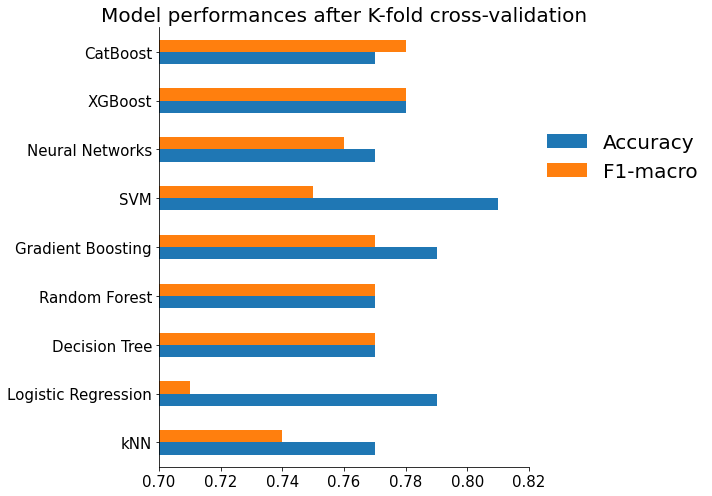

In [69]:
model_data[['Accuracy','F1-macro']].plot.barh(figsize=(10,7))
plt.legend(frameon=False,bbox_to_anchor=(1,0.8), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.7,0.82]);
plt.title('Model performances after K-fold cross-validation',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('model-comparision.png',dpi=300)

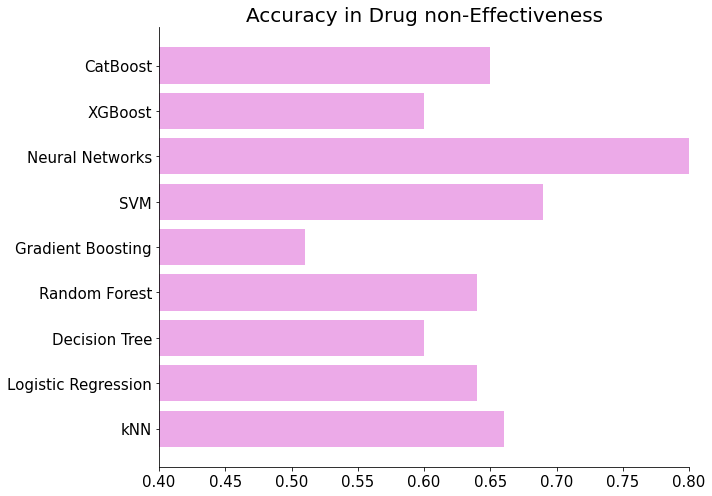

In [70]:
color=sns.color_palette('hls')
plt.figure(figsize=(10,7))
drug_accuracy = [0.66, 0.64, 0.60, 0.64, 0.51, 0.69, 0.86, 0.60,0.65]
plt.barh(models,drug_accuracy,alpha=0.5, color=color[5])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.4,0.8])
plt.title('Accuracy in Drug non-Effectiveness',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('drug-noneffectiveness.png',dpi=300)

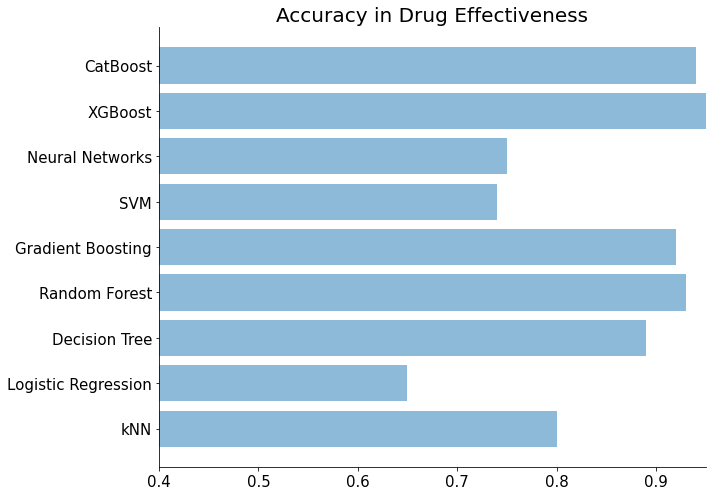

In [71]:
plt.figure(figsize=(10,7))
drug_accuracy = [0.80, 0.65, 0.89, 0.93, 0.92, 0.74, 0.75, 0.95, 0.94]
plt.barh(models,drug_accuracy,alpha=0.5)
plt.xlim([0.4,0.95])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy in Drug Effectiveness',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('drug-effectiveness.png',dpi=300)

# Conclusion
- Performance of all machine learning models used is decent based on 10-fold cross validation of the dataset. `XGBoost` seems to providing the best performance.
- `Neural Network` achieves a highest score in predicting both classes.
- Feature selection suggests the `NumHDonors` and `NumHAcceptors` are the most crucial factor for the successful prediction of bioactivity of the drug.
